In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
corpus = [
    """Deep learning (also known as deep structured learning) is part of a 
    broader family of machine learning methods based on artificial neural networks 
    with representation learning. Learning can be supervised, semi-supervised or unsupervised.
    Deep-learning architectures such as deep neural networks, deep belief networks, 
    deep reinforcement learning, recurrent neural networks, convolutional neural networks and 
    Transformers have been applied to fields including computer vision, speech recognition, 
    natural language processing, machine translation, bioinformatics, drug design, 
    medical image analysis, climate science, material inspection and board game programs, 
    where they have produced results comparable to and in some cases surpassing human expert performance.
    """
]


In [7]:
clean_text=[sen.lower() for sen in corpus]
print(clean_text)


['deep learning (also known as deep structured learning) is part of a \n    broader family of machine learning methods based on artificial neural networks \n    with representation learning. learning can be supervised, semi-supervised or unsupervised.\n    deep-learning architectures such as deep neural networks, deep belief networks, \n    deep reinforcement learning, recurrent neural networks, convolutional neural networks and \n    transformers have been applied to fields including computer vision, speech recognition, \n    natural language processing, machine translation, bioinformatics, drug design, \n    medical image analysis, climate science, material inspection and board game programs, \n    where they have produced results comparable to and in some cases surpassing human expert performance.\n    ']


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk=Tokenizer()

In [9]:
tk.fit_on_texts(clean_text)
w2idx=tk.word_index
idx2w={v:k for k,v in w2idx.items()}
print(w2idx)
print(idx2w)

{'learning': 1, 'deep': 2, 'networks': 3, 'neural': 4, 'and': 5, 'as': 6, 'of': 7, 'machine': 8, 'supervised': 9, 'have': 10, 'to': 11, 'also': 12, 'known': 13, 'structured': 14, 'is': 15, 'part': 16, 'a': 17, 'broader': 18, 'family': 19, 'methods': 20, 'based': 21, 'on': 22, 'artificial': 23, 'with': 24, 'representation': 25, 'can': 26, 'be': 27, 'semi': 28, 'or': 29, 'unsupervised': 30, 'architectures': 31, 'such': 32, 'belief': 33, 'reinforcement': 34, 'recurrent': 35, 'convolutional': 36, 'transformers': 37, 'been': 38, 'applied': 39, 'fields': 40, 'including': 41, 'computer': 42, 'vision': 43, 'speech': 44, 'recognition': 45, 'natural': 46, 'language': 47, 'processing': 48, 'translation': 49, 'bioinformatics': 50, 'drug': 51, 'design': 52, 'medical': 53, 'image': 54, 'analysis': 55, 'climate': 56, 'science': 57, 'material': 58, 'inspection': 59, 'board': 60, 'game': 61, 'programs': 62, 'where': 63, 'they': 64, 'produced': 65, 'results': 66, 'comparable': 67, 'in': 68, 'some': 69, 

In [10]:
sequence=tk.texts_to_sequences(clean_text)
print(sequence)

[[2, 1, 12, 13, 6, 2, 14, 1, 15, 16, 7, 17, 18, 19, 7, 8, 1, 20, 21, 22, 23, 4, 3, 24, 25, 1, 1, 26, 27, 9, 28, 9, 29, 30, 2, 1, 31, 32, 6, 2, 4, 3, 2, 33, 3, 2, 34, 1, 35, 4, 3, 36, 4, 3, 5, 37, 10, 38, 39, 11, 40, 41, 42, 43, 44, 45, 46, 47, 48, 8, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 5, 60, 61, 62, 63, 64, 10, 65, 66, 67, 11, 5, 68, 69, 70, 71, 72, 73, 74]]


In [11]:
context_size=2
emb_size=10
vocab_size=len(w2idx)+1
target=[]
context=[]

for seq in sequence:
    for i in range(context_size,len(seq)-context_size):
        target.append(seq[i])
        temp=seq[i-context_size:i]+seq[i+1:i+context_size+1]
        context.append(temp)
        
print(target)
print(context)

[12, 13, 6, 2, 14, 1, 15, 16, 7, 17, 18, 19, 7, 8, 1, 20, 21, 22, 23, 4, 3, 24, 25, 1, 1, 26, 27, 9, 28, 9, 29, 30, 2, 1, 31, 32, 6, 2, 4, 3, 2, 33, 3, 2, 34, 1, 35, 4, 3, 36, 4, 3, 5, 37, 10, 38, 39, 11, 40, 41, 42, 43, 44, 45, 46, 47, 48, 8, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 5, 60, 61, 62, 63, 64, 10, 65, 66, 67, 11, 5, 68, 69, 70, 71, 72]
[[2, 1, 13, 6], [1, 12, 6, 2], [12, 13, 2, 14], [13, 6, 14, 1], [6, 2, 1, 15], [2, 14, 15, 16], [14, 1, 16, 7], [1, 15, 7, 17], [15, 16, 17, 18], [16, 7, 18, 19], [7, 17, 19, 7], [17, 18, 7, 8], [18, 19, 8, 1], [19, 7, 1, 20], [7, 8, 20, 21], [8, 1, 21, 22], [1, 20, 22, 23], [20, 21, 23, 4], [21, 22, 4, 3], [22, 23, 3, 24], [23, 4, 24, 25], [4, 3, 25, 1], [3, 24, 1, 1], [24, 25, 1, 26], [25, 1, 26, 27], [1, 1, 27, 9], [1, 26, 9, 28], [26, 27, 28, 9], [27, 9, 9, 29], [9, 28, 29, 30], [28, 9, 30, 2], [9, 29, 2, 1], [29, 30, 1, 31], [30, 2, 31, 32], [2, 1, 32, 6], [1, 31, 6, 2], [31, 32, 2, 4], [32, 6, 4, 3], [6, 2, 3, 2], [2, 4, 2, 33], [4,

In [12]:
x=np.array(context)
y=np.array(target)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Lambda,Dense,Dropout

In [14]:
import tensorflow as tf
model=Sequential([
  Embedding(input_dim=vocab_size,output_dim=emb_size,input_length=2*context_size),
  Lambda(lambda x:tf.reduce_mean(x,axis=1)),
  Dense(256,activation='relu'),
  Dense(512,activation='relu'),
  Dense(vocab_size,activation='softmax')
])

C:\Users\Shounak\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy,metrics=['accuracy'])

In [16]:
model.fit(x,y,epochs=300,batch_size=10,shuffle=True)

Epoch 1/300

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.0238 - loss: 4.3188
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0447 - loss: 4.3042   
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0427 - loss: 4.2892  
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0683 - loss: 4.2530
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0570 - loss: 4.17724.20
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0584 - loss: 4.0430
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0660 - loss: 3.9285
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1147 - loss: 3.7191
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0984 - loss: 3.6186     
Epoch 10/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1123 - loss: 3.4888
Epoch 11/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1285 - loss: 3.3569
Epoch 12/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4

<Axes: >

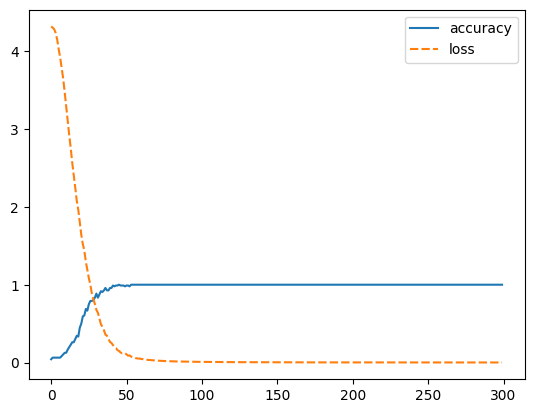

In [17]:
sns.lineplot(model.history.history)

In [18]:
x_inp=["the latest trending field in","to be oil of current"]
for sen in x_inp:
    low=sen.lower()
    words=low.split(" ")
    ind=[]
    for w in words:
        i=w2idx.get(w)
        if i is not None:
            ind.append(i)
    while len(ind) < 2 * context_size:
      ind.append(0)  # Assuming padding index is 0   
    x_inp_test=np.array([ind])
    pred=model.predict(x_inp_test)
    ac_ind=pred.argmax()
    print(idx2w.get(ac_ind))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
inspection
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
have
